In [1]:
# import packages
import os
import pandas as pd
import numpy as np
import pyEX as p
import matplotlib.pyplot as plt 
from matplotlib.pylab import date2num
from datetime import datetime, timedelta
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [10]:
# import data
dir_data = 'C:\\Users\\user\\Desktop\\CFO'
Exchange_path_1 = os.path.join(dir_data, 'fxdata_2.txt')
Exchange_path_2 = os.path.join(dir_data, 'fxdata_1.txt')
Exchange_path_3 = os.path.join(dir_data, 'fxdata.txt')
Exchange_1 = pd.read_csv(Exchange_path_1, encoding='utf8', sep = '	' )
Exchange_2 = pd.read_csv(Exchange_path_2, encoding='utf8', sep = '	' )
Exchange_3 = pd.read_csv(Exchange_path_3, encoding='utf8', sep = '	' )

In [11]:
# Append
Exchange_All = Exchange_1.append(Exchange_2, ignore_index=True).append(Exchange_3,ignore_index=True)
Exchange_All['YYYY/MM/DD'] = pd.to_datetime(Exchange_All['YYYY/MM/DD'])
Exchange_All = Exchange_All.sort_values(by='YYYY/MM/DD')
Exchange_All['Year'] = Exchange_All['YYYY/MM/DD'].map(lambda x: x.year)
Exchange_All['Month'] = Exchange_All['YYYY/MM/DD'].map(lambda x: x.month)
Exchange_All.head()

,Jul.Day,YYYY/MM/DD,Wdy,JPY/USD,Year,Month
0,2454834,2009-01-02,Fri,91.167,2009,1
1,2454837,2009-01-05,Mon,93.224,2009,1
2,2454838,2009-01-06,Tue,94.207,2009,1
3,2454839,2009-01-07,Wed,92.674,2009,1
4,2454840,2009-01-08,Thu,91.166,2009,1


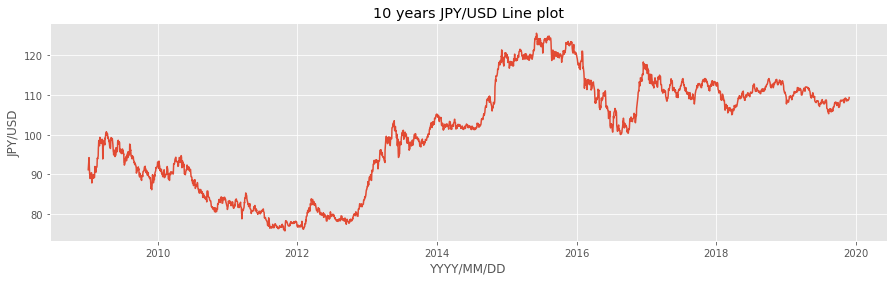

In [12]:
# Line plot for 10 Years
plt.figure(figsize=(15,4))
sns.lineplot(x = 'YYYY/MM/DD', y = 'JPY/USD', data = Exchange_All)
plt.title('10 years JPY/USD Line plot')
plt.show()

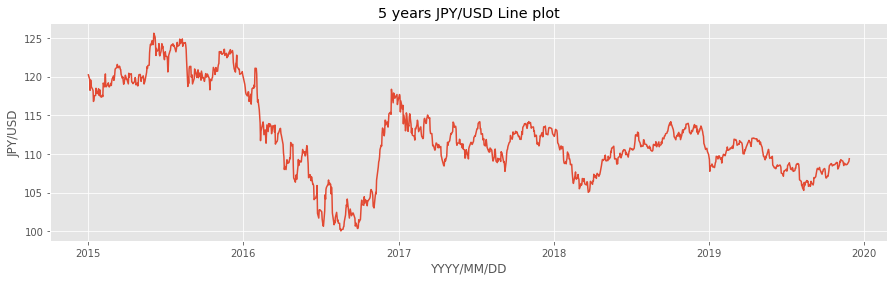

In [13]:
# Line plot for 5 Years
plt.figure(figsize=(15,4))
sns.lineplot(x = 'YYYY/MM/DD', y = 'JPY/USD', data = Exchange_All.loc[Exchange_All['Year'] >= 2015])
plt.title('5 years JPY/USD Line plot')
plt.show()

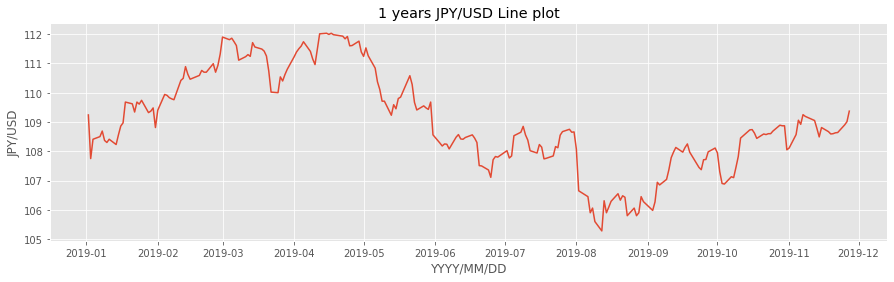

In [14]:
# Line plot for 1 Years
plt.figure(figsize=(15,4))
sns.lineplot(x = 'YYYY/MM/DD', y = 'JPY/USD', data = Exchange_All.loc[Exchange_All['Year'] == 2019])
plt.title('1 years JPY/USD Line plot')
plt.show()

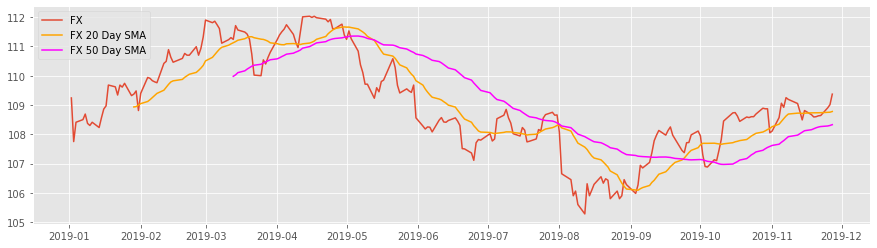

In [15]:
# Rolling MA (1-year)
plt.figure(figsize=(15,4))
rolling_mean = Exchange_All.loc[Exchange_All['Year'] == 2019,'JPY/USD'].rolling(window=20).mean()
rolling_mean2 = Exchange_All.loc[Exchange_All['Year'] == 2019,'JPY/USD'].rolling(window=50).mean()
plt.plot(Exchange_All.loc[Exchange_All['Year'] == 2019,'YYYY/MM/DD'],\
         Exchange_All.loc[Exchange_All['Year'] == 2019,'JPY/USD'], label='FX')
plt.plot(Exchange_All.loc[Exchange_All['Year'] == 2019,'YYYY/MM/DD'], rolling_mean, label='FX 20 Day SMA', color='orange')
plt.plot(Exchange_All.loc[Exchange_All['Year'] == 2019,'YYYY/MM/DD'], rolling_mean2, label='FX 50 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

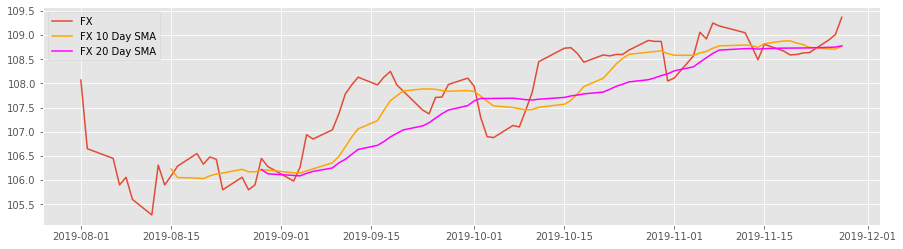

In [16]:
# Rolling MA (3-Month)
plt.figure(figsize=(15,4))
rolling_mean = Exchange_All.loc[(Exchange_All['Year'] == 2019) & \
                                (Exchange_All['Month'] >= 8),'JPY/USD'].rolling(window=10).mean()
rolling_mean2 = Exchange_All.loc[(Exchange_All['Year'] == 2019) & \
                                (Exchange_All['Month'] >= 8),'JPY/USD'].rolling(window=20).mean()
plt.plot(Exchange_All.loc[(Exchange_All['Year'] == 2019) & \
                                (Exchange_All['Month'] >= 8),'YYYY/MM/DD'],\
         Exchange_All.loc[(Exchange_All['Year'] == 2019) & \
                                (Exchange_All['Month'] >= 8),'JPY/USD'], label='FX')
plt.plot(Exchange_All.loc[(Exchange_All['Year'] == 2019) & \
                                (Exchange_All['Month'] >= 8),'YYYY/MM/DD']\
         , rolling_mean, label='FX 10 Day SMA', color='orange')
plt.plot(Exchange_All.loc[(Exchange_All['Year'] == 2019) & \
                                (Exchange_All['Month'] >= 8),'YYYY/MM/DD'],\
         rolling_mean2, label='FX 20 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

In [18]:
import technical_indicators as tai

In [ ]:
tai.